In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import griddata

In [3]:
data = scipy.io.loadmat("Reference PINN Code (Raissi)/cylinder_nektar_wake.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X_star', 't', 'U_star', 'p_star'])

In [4]:
U_star = data['U_star'] # N x 2 x T
P_star = data['p_star'] # N x T
t_star = data['t'] # T x 1
X_star = data['X_star'] # N x 2
x_star = X_star[:,0:1]
y_star = X_star[:,1:2]

N = X_star.shape[0]

In [5]:
# Selecting data at time T = 100
u_star_100 = U_star[:,0,100]
v_star_100 = U_star[:,1,100]
p_star_100 = P_star[:,100]

In [6]:
X, Y = np.meshgrid(x_star, y_star)

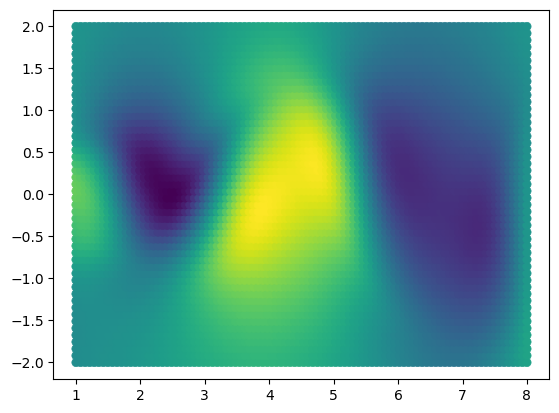

In [7]:
plt.scatter(x_star, y_star, c=U_star[:,1,100], cmap='viridis', linewidth=0.5);

In [8]:
snap = np.array([100])
TT = np.tile(t_star, (1,N)).T # N x T
t_star = TT[:,snap]
p_star = P_star[:,snap]

lb = X_star.min(0)
ub = X_star.max(0)
nn = 200
x = np.linspace(lb[0], ub[0], nn)
y = np.linspace(lb[1], ub[1], nn)
X,Y = np.meshgrid(x,y)

P_exact = griddata(X_star, p_star.flatten(), (X,Y), method='cubic')


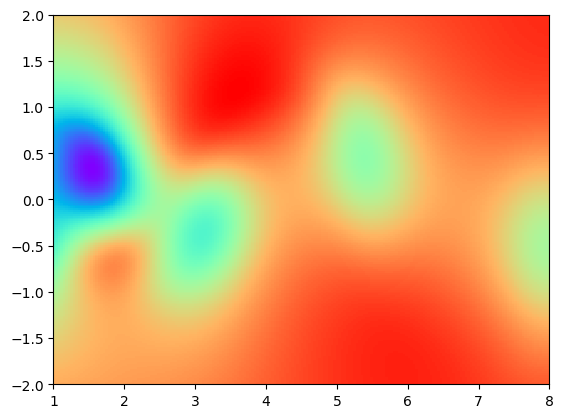

In [9]:
plt.imshow(P_exact, interpolation='nearest', cmap='rainbow', 
                  extent=[x_star.min(), x_star.max(), y_star.min(), y_star.max()], 
                  origin='lower', aspect='auto')